<a href="https://colab.research.google.com/github/ghattas360/AI_SQL_Agent/blob/main/Data_Analysis_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ghattas Saliba - ID: 202212659**
# **Rawad Shayya - ID: ...**

# **______________________________**
# **Project Plan Overview**


## 1.  Scrape Data:
      
  Scrape transaction data from Etherscan or DeFi Pulse.
## 2.   Extract features such as:

*   Gas fees
*   Wallet age

*   Token flow and distribution
*   Number of token holders

*   Transaction frequency


## 3.   **Preprocess & Prepare Data**:


*   Clean and format data.

*   Extract features to label and prepare data for modeling.


## 4.   Feature Engineering:

*    Create meaningful features for fraud detection.

*    Normalize and scale data.

## 5.   Model Training:

*    Train and compare:

*    Isolation Forest (for anomaly detection)

*    Graph Neural Networks (GNNs) (for relationship-based fraud detection)

## 6.   Evaluate Models:

*    Use precision, recall, F1 score, and AUC to compare models.

*    Interpret results and determine which model performs best.

# **Step 1: Choose a Data Source**
  **We are going to use the Etherscan API**

 Etherscan API is the most widely used Etherum blockchaoin explorer.

 Provides rich data on:



*   Transactions
*   Internal transactions

*   ERC-20 token transfers
*   Contract events and method calls

✅ Pros:

*   Comprehensive and well-documented API.
*   Suitable for scraping large amounts of blockchain data.

❌ Cons:

*   API rate limits (5 requests/second, up to 100k requests/day).
*   Paid plans are required for higher rate limits.

# **Step 2: Get Etherscan API Key**

1. Sing up to [Etherscan](https://etherscan.io/register) and verify your email and login
2. Create an API key by going to the API keys [page](https://https://info.etherscan.com/api-keys/) and Click on (+add) and create a new API key.

# **Step 3: Set Up Your Environment**

**Install Required Libraries**

In [2]:
pip install requests pandas

# **Step 4: Request Transaction Data Using Etherscan API**

Get Transaction List by Address

Retrieves normal transactions for an address.

API Endpoint:

https://api.etherscan.io/api?module=account&action=txlist&address=<ADDRESS>&startblock=0&endblock=99999999&sort=asc&apikey=<YOUR_API_KEY>


# **Web Scraper to get the addresses of top 1000 holders on [Etherscan](https://https://etherscan.io/token/generic-tokenholders2?a=0xdAC17F958D2ee523a2206206994597C13D831ec7&sid=&m=light&s=0&p=1)**

Navigates through all 20 pages on Etherscan.

Visits each of the 50 holder links per page.

Extracts the wallet address from each individual holder page.

Saves all wallet addresses into the first column of a CSV.

Stores the CSV in your Google Drive.

**Prerequisites Before Running**

In your Colab environment:

*   Connect to Google Drive.
*   Install Selenium and ChromeDriver.

In [3]:
#Mounting the google Drive to the notebook
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!pip install selenium
!apt-get update

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 32.2 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jamm

**Now we need to configure the browser for headless mode (no GUI)**

**In Pwershell checking the version of Chrome**



```
PS C:\Users\Admin> (Get-Item "C:\Program Files\Google\Chrome\Application\chrome.exe").VersionInfo | Select-Object ProductVersion

ProductVersion
--------------
134.0.6998.177
```



**Go to this URL to get the ChromeDriver that matches version 134.0.6998.177:**

🔗 [link text](https://googlechromelabs.github.io/chrome-for-testing/
)
Select:

Channel: Stable

Version: 134.0.6998.177

Platform: linux 64-bit

Upload the zip directory.



# **After uploading the Chrome Driver from local machine**

Upload the chrome-driver-linux64 and Unzip the file

giving it the right to execute and checking the version

In [5]:
!unzip -o chromedriver-linux64.zip
!cp chromedriver-linux64/chromedriver /usr/bin/
!chmod +x /usr/bin/chromedriver
!chromedriver --version


Archive:  chromedriver-linux64.zip
  inflating: chromedriver-linux64/LICENSE.chromedriver  
  inflating: chromedriver-linux64/THIRD_PARTY_NOTICES.chromedriver  
  inflating: chromedriver-linux64/chromedriver  
ChromeDriver 134.0.6998.165 (fd886e2cb29dd984c13deec032832dee68d8abe3-refs/branch-heads/6998@{#2122})


# **Installing Chrome for Google Colab**

In [6]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb || apt --fix-broken install -y
!apt install -y google-chrome-stable


--2025-03-30 18:19:19--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 192.178.163.93, 192.178.163.190, 192.178.163.136, ...
Connecting to dl.google.com (dl.google.com)|192.178.163.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114483440 (109M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 109.18M   217MB/s    in 0.5s    

2025-03-30 18:19:20 (217 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [114483440/114483440]

Selecting previously unselected package google-chrome-stable.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (134.0.6998.165-1) ...
dpkg: dependency problems prevent configuration of google-chrome-stable:
 google-chrome-stable depends on libvulkan1; however:
  Packa

In [8]:
!which google-chrome


/usr/bin/google-chrome


# **Testing The setup before start scraping**

In [8]:
# Good! Required Selenium imports
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options


In [9]:
# Excellent: These arguments make Chrome headless and Colab-compatible
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-blink-features=AutomationControlled')  # Helps avoid bot detection
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134 Safari/537.36')  # Realistic UA


In [10]:
# ✅ Corrected: This is the actual location of Chrome in Colab
options.binary_location = '/usr/bin/google-chrome'


In [11]:
# ✅ Correct path to the ChromeDriver you installed earlier
service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(service=service, options=options)


In [12]:
# Test is perfect
driver.get("https://example.com")
print("✅ Title:", driver.title)


✅ Title: Example Domain


✅ ChromeDriver 134.0.6998.165

✅ Google Chrome 134.x

✅ Colab properly configured


# **Scraper** for the Wallet Addresses

In [ ]:
# import time
# import pandas as pd
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from google.colab import drive

# # ✅ Mount Drive
# drive.mount('/content/drive')

# # ✅ Set up Selenium
# options = Options()
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# options.add_argument('--disable-blink-features=AutomationControlled')
# options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134 Safari/537.36')
# options.binary_location = '/usr/bin/google-chrome'
# service = Service('/usr/bin/chromedriver')
# driver = webdriver.Chrome(service=service, options=options)

# # ✅ Scraper logic
# wallet_addresses = []
# base_url = "https://etherscan.io/token/generic-tokenholders2?a=0xdAC17F958D2ee523a2206206994597C13D831ec7&sid=&m=light&s=0&p="

# for page in range(1, 21):
#     print(f"\n📄 Scraping Page {page}")
#     driver.get(base_url + str(page))
#     WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#maintable > div.table-responsive > table > tbody")))

#     # Get initial rows for the page (we store row count, not elements)
#     row_count = len(driver.find_elements(By.CSS_SELECTOR, "#maintable > div.table-responsive > table > tbody > tr"))

#     for index in range(1, row_count + 1):
#         try:
#             # Refresh the DOM to avoid stale element reference
#             driver.get(base_url + str(page))
#             WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#maintable > div.table-responsive > table > tbody")))

#             # Re-select the row and extract the link
#             row_selector = f"#maintable > div.table-responsive > table > tbody > tr:nth-child({index})"
#             row = driver.find_element(By.CSS_SELECTOR, row_selector)
#             link = row.find_element(By.TAG_NAME, "a").get_attribute("href")

#             # Visit wallet page
#             driver.get(link)
#             WebDriverWait(driver, 5).until(
#                 EC.presence_of_element_located((By.CSS_SELECTOR, "#ContentPlaceHolder1_divFilteredHolderAddress > div"))
#             )
#             address = driver.find_element(By.CSS_SELECTOR, "#ContentPlaceHolder1_divFilteredHolderAddress > div").text.strip()
#             wallet_addresses.append(address)
#             print(f"✅ {len(wallet_addresses)}: {address}")

#         except Exception as e:
#             print(f"❌ Row {index} Error: {e}")
#             continue

# # ✅ Save to Google Drive
# df = pd.DataFrame(wallet_addresses, columns=["Wallet Address"])
# output_path = "/content/drive/MyDrive/wallet_addresses.csv"
# df.to_csv(output_path, index=False)
# print(f"\n✅ Done! Saved {len(wallet_addresses)} addresses to:\n{output_path}")

# driver.quit()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📄 Scraping Page 1
✅ 1: 0xF977814e90dA44bFA03b6295A0616a897441aceC
✅ 2: 0x47ac0Fb4F2D84898e4D9E7b4DaB3C24507a6D503
✅ 3: 0x5a52E96BAcdaBb82fd05763E25335261B270Efcb
✅ 4: 0x835678a611B28684005a5e2233695fB6cbbB0007
✅ 5: 0x5754284f345afc66a98fbB0a0Afe71e0F007B949
✅ 6: 0xee136C0389733849Dd710AC7104E92C6bF497574
✅ 7: 0x23878914EFE38d27C4D67Ab83ed1b93A74D4086a
✅ 8: 0x6C96dE32CEa08842dcc4058c14d3aaAD7Fa41dee
✅ 9: 0x40ec5B33f54e0E8A33A975908C5BA1c14e5BbbDf
✅ 10: 0xf89d7b9c864f589bbF53a82105107622B35EaA40
✅ 11: 0x559432E18b281731c054cD703D4B49872BE4ed53
✅ 12: 0xa7C0D36c4698981FAb42a7d8c783674c6Fe2592d
✅ 13: 0x6Fb624B48d9299674022a23d92515e76Ba880113
✅ 14: 0xf59869753f41Db720127Ceb8DbB8afAF89030De4
✅ 15: 0xc708A1c712bA26DC618f972ad7A187F76C8596Fd
✅ 16: 0xD6216fC19DB775Df9774a6E33526131dA7D19a2c
✅ 17: 0x3CC936b795A188F0e246cBB2D74C5Bd190aeCF18
✅ 18: 0xc5451b523d5FFfe13513

In [26]:
# import time
# import pandas as pd
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from google.colab import drive
# import os
# import shutil

# # ✅ Mount Drive
# drive.mount('/content/drive')

# # ✅ Set up Selenium
# options = Options()
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# options.add_argument('--disable-blink-features=AutomationControlled')
# options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134 Safari/537.36')
# options.binary_location = '/usr/bin/google-chrome'

# # Specify a unique user data directory
# user_data_dir = '/tmp/user-data' + str(int(time.time()))  # Create a unique directory name
# options.add_argument(f'--user-data-dir={user_data_dir}')

# service = Service('/usr/bin/chromedriver')
# driver = webdriver.Chrome(service=service, options=options)

# # ✅ Scraper logic
# wallet_addresses = []
# base_url = "https://etherscan.io/token/generic-tokenholders2?a=0xdAC17F958D2ee523a2206206994597C13D831ec7&sid=&m=light&s=0&p="

# for page in range(1, 21):
#     print(f"\n📄 Scraping Page {page}")
#     driver.get(base_url + str(page))
#     WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#maintable > div.table-responsive > table > tbody")))

#     # Get initial rows for the page (we store row count, not elements)
#     row_count = len(driver.find_elements(By.CSS_SELECTOR, "#maintable > div.table-responsive > table > tbody > tr"))

#     for index in range(1, row_count + 1):
#         try:
#             # Refresh the DOM to avoid stale element reference
#             driver.get(base_url + str(page))
#             WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "#maintable > div.table-responsive > table > tbody")))

#             # Re-select the row and extract the link
#             row_selector = f"#maintable > div.table-responsive > table > tbody > tr:nth-child({index})"
#             row = driver.find_element(By.CSS_SELECTOR, row_selector)
#             link = row.find_element(By.TAG_NAME, "a").get_attribute("href")

#             # Visit wallet page
#             driver.get(link)
#             WebDriverWait(driver, 5).until(
#                 EC.presence_of_element_located((By.CSS_SELECTOR, "#ContentPlaceHolder1_divFilteredHolderAddress > div"))
#             )
#             address = driver.find_element(By.CSS_SELECTOR, "#ContentPlaceHolder1_divFilteredHolderAddress > div").text.strip()
#             wallet_addresses.append(address)
#             print(f"✅ {len(wallet_addresses)}: {address}")

#         except Exception as e:
#             print(f"❌ Row {index} Error: {e}")
#             continue

# # ✅ Save to Google Drive
# df = pd.DataFrame(wallet_addresses, columns=["Wallet Address"])
# output_path = "/content/drive/MyDrive/wallet_addresses.csv"
# df.to_csv(output_path, index=False)
# print(f"\n✅ Done! Saved {len(wallet_addresses)} addresses to:\n{output_path}")

# driver.quit()

# # Clean up user data directory
# shutil.rmtree(user_data_dir, ignore_errors=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📄 Scraping Page 1
✅ 1: 0xF977814e90dA44bFA03b6295A0616a897441aceC
✅ 2: 0x47ac0Fb4F2D84898e4D9E7b4DaB3C24507a6D503
✅ 3: 0x5a52E96BAcdaBb82fd05763E25335261B270Efcb
✅ 4: 0x835678a611B28684005a5e2233695fB6cbbB0007
✅ 5: 0x5754284f345afc66a98fbB0a0Afe71e0F007B949
✅ 6: 0xee136C0389733849Dd710AC7104E92C6bF497574
✅ 7: 0x23878914EFE38d27C4D67Ab83ed1b93A74D4086a
✅ 8: 0x6C96dE32CEa08842dcc4058c14d3aaAD7Fa41dee
✅ 9: 0x40ec5B33f54e0E8A33A975908C5BA1c14e5BbbDf
✅ 10: 0xf89d7b9c864f589bbF53a82105107622B35EaA40
✅ 11: 0x559432E18b281731c054cD703D4B49872BE4ed53
✅ 12: 0xa7C0D36c4698981FAb42a7d8c783674c6Fe2592d
✅ 13: 0x6Fb624B48d9299674022a23d92515e76Ba880113
✅ 14: 0xf59869753f41Db720127Ceb8DbB8afAF89030De4
✅ 15: 0xc708A1c712bA26DC618f972ad7A187F76C8596Fd
✅ 16: 0xD6216fC19DB775Df9774a6E33526131dA7D19a2c
✅ 17: 0x3CC936b795A188F0e246cBB2D74C5Bd190aeCF18
✅ 18: 0xc5451b523d5FFfe13513

In [ ]:
# import time
# import pandas as pd
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from google.colab import drive
# import os
# import shutil

# # ✅ Mount Google Drive
# drive.mount('/content/drive')

# # ✅ Setup Chrome Options
# options = Options()
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# options.add_argument('--disable-blink-features=AutomationControlled')
# options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134 Safari/537.36')
# options.binary_location = '/usr/bin/google-chrome'

# # Use unique temp profile to avoid Chrome errors
# user_data_dir = '/tmp/user-data-' + str(int(time.time()))
# options.add_argument(f'--user-data-dir={user_data_dir}')

# # ✅ Initialize Chrome Driver
# service = Service('/usr/bin/chromedriver')
# driver = webdriver.Chrome(service=service, options=options)

# # ✅ Scraper Logic
# wallet_data = []
# max_pages = 100  # total pages to scrape

# try:
#     for page in range(1, max_pages + 1):
#         print(f"\n📄 Scraping Page {page}...")
#         try:
#             url = f"https://etherscan.io/accounts/{page}?ps=100"
#             driver.get(url)

#             # Wait until rows inside the tbody are present
#             WebDriverWait(driver, 20).until(
#                 EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#ContentPlaceHolder1_divTable > table > tbody > tr"))
#             )

#             rows = driver.find_elements(By.CSS_SELECTOR, "#ContentPlaceHolder1_divTable > table > tbody > tr")

#             for index, row in enumerate(rows, start=1):
#                 try:
#                     # Wallet link and balance are both in the row
#                     wallet_link = row.find_element(By.CSS_SELECTOR, "td:nth-child(2) a").get_attribute("href")
#                     balance = row.find_element(By.CSS_SELECTOR, "td:nth-child(4)").text.strip()

#                     # Go to wallet page to extract actual address
#                     driver.get(wallet_link)

#                     WebDriverWait(driver, 10).until(
#                         EC.presence_of_element_located((By.CSS_SELECTOR, "#content > section:nth-child(13) > div > div.d-flex.flex-column.gap-2 > div > div:nth-child(2) > span"))
#                     )
#                     address = driver.find_element(By.CSS_SELECTOR, "#content > section:nth-child(13) > div > div.d-flex.flex-column.gap-2 > div > div:nth-child(2) > span").text.strip()

#                     wallet_data.append({
#                         "Address": address,
#                         "Balance": balance
#                     })

#                     print(f"✅ Page {page} | Row {index} → {address} | Balance: {balance}")

#                     # Return to main list
#                     driver.back()
#                     WebDriverWait(driver, 10).until(
#                         EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#ContentPlaceHolder1_divTable > table > tbody > tr"))
#                     )
#                 except Exception as row_error:
#                     print(f"❌ Page {page} | Row {index} Error: {row_error}")
#                     continue

#         except Exception as page_error:
#             driver.save_screenshot(f"/content/drive/MyDrive/error_page_{page}.png")
#             print(f"❌ Error loading page {page}: {page_error}")
#             break

# finally:
#     driver.quit()
#     shutil.rmtree(user_data_dir, ignore_errors=True)

# # ✅ Save Results to CSV in Drive
# df = pd.DataFrame(wallet_data)
# output_path = "/content/drive/MyDrive/eth_wallets_balances.csv"
# df.to_csv(output_path, index=False)
# print(f"\n✅ Done! Saved {len(wallet_data)} wallets to:\n{output_path}")


Streaming output truncated to the last 5000 lines.
✅ Page 38 | Row 98 → 0xa1AA6810D574997da369AB1D7b5aDAFeAFBf9e11 | Balance: 1,857.26930903 ETH
✅ Page 38 | Row 99 → 0xE37Fe79F348355285638e7C6aCb0beA1c17Bb559 | Balance: 1,857.0947 ETH
✅ Page 38 | Row 100 → 0xfC3D59835A9DCebE4391f54a92Aa551937bc21EB | Balance: 1,856.42646689 ETH

📄 Scraping Page 39...
✅ Page 39 | Row 1 → 0xE37Fe79F348355285638e7C6aCb0beA1c17Bb559 | Balance: 1,857.0947 ETH
✅ Page 39 | Row 2 → 0xfC3D59835A9DCebE4391f54a92Aa551937bc21EB | Balance: 1,856.42646689 ETH
✅ Page 39 | Row 3 → 0xF3D60d4739DE2929FF760dC96DE3b7D4F47EA2A7 | Balance: 1,856.25288169 ETH
✅ Page 39 | Row 4 → 0xafda7f812d468985c00CdFBCFBB2e75236ba0d16 | Balance: 1,855.7630582 ETH
✅ Page 39 | Row 5 → 0x8978182d055C15bc6214683f70B21a586E7400ba | Balance: 1,854.6790666 ETH
✅ Page 39 | Row 6 → 0x8e04Af7F7c76daA9AB429b1340E0327B5B835748 | Balance: 1,853.7901377 ETH
✅ Page 39 | Row 7 → 0x757354acfA0c4065d6A4e3983632d54EBae51b29 | Balance: 1,853 ETH
✅ Page 39 | 

# **Limitations of Colab, and handling the issue**

The output from Colab is truncated to the last 5,000 lines, even though the expected scraped data consists of 10,000 rows. To handle this, I copied the output and saved it as a `.txt` file. Next, I will download from the website the first 38 pages and the last 10 pages, organizing the data in descending order based on the Ethereum amount per wallet. I will then use a tokenizer to extract the hash keys representing wallet addresses and their Ethereum balances, and save the parsed data into a `.csv` file

In [23]:
# import pandas as pd
# import re
# import os
# from google.colab import drive

# # ✅ Mount drive
# drive.mount('/content/drive')

# # ✅ Path setup
# folder_path = '/content/drive/MyDrive/etherscan'
# txt_file_path = '/content/drive/MyDrive/etherscanScraper.txt'

# # ✅ Parse Excel CSV files
# all_csv_data = []

# for filename in sorted(os.listdir(folder_path), key=lambda x: int(x.split('.')[0])):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(folder_path, filename)
#         df = pd.read_csv(file_path)
#         if 'Address' in df.columns and 'Balance' in df.columns:
#             temp_df = df[['Address', 'Balance']].copy()
#             # Remove " ETH" and convert to float
#             temp_df['Balance'] = temp_df['Balance'].str.replace(' ETH', '').str.replace(',', '').astype(float)
#             all_csv_data.append(temp_df)

# csv_df = pd.concat(all_csv_data, ignore_index=True)

# # ✅ Parse TXT file
# txt_wallets = []
# with open(txt_file_path, 'r') as file:
#     for line in file:
#         match = re.search(r'→\s(0x[a-fA-F0-9]{40})\s\|\sBalance:\s([\d.,]+)\sETH', line)
#         if match:
#             addr = match.group(1)
#             bal = float(match.group(2).replace(',', ''))
#             txt_wallets.append({'Address': addr, 'Balance': bal})

# txt_df = pd.DataFrame(txt_wallets)

# # ✅ Merge & sort
# final_df = pd.concat([csv_df, txt_df], ignore_index=True)
# final_df = final_df.sort_values(by='Balance', ascending=False).reset_index(drop=True)

# # ✅ Save result
# output_path = '/content/drive/MyDrive/merged_sorted_wallets.csv'
# final_df.to_csv(output_path, index=False)

# print(f"✅ All done! Merged and saved {len(final_df)} wallets to:\n{output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ All done! Merged and saved 9700 wallets to:
/content/drive/MyDrive/merged_sorted_wallets.csv


This step fetches Ethereum transaction data for the top 9,700 wallet addresses using the Etherscan API.
Each transaction is tagged with its source wallet and saved into a single master CSV file.
The API requests are limited to 4 per second to comply with the free tier.
This master dataset will be used for training and analyzing suspicious transaction patterns.

In [25]:
# import pandas as pd
# import requests
# import time
# import os

# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # === CONFIG ===
# CSV_PATH = '/content/drive/MyDrive/merged_sorted_wallets.csv'
# MASTER_FILE = '/content/drive/MyDrive/master_transactions.csv'
# API_KEY = 'MFF1MT2NJJ61DKC6NP8F2FPY3IJN4EY2FT'
# REQUESTS_PER_SECOND = 4
# SLEEP_TIME = 1.0 / REQUESTS_PER_SECOND

# # Load wallet addresses
# df = pd.read_csv(CSV_PATH)
# wallets = df.iloc[:, 0].dropna().unique().tolist()

# # Remove existing master file if starting fresh (optional)
# if os.path.exists(MASTER_FILE):
#     print("Removing old master file...")
#     os.remove(MASTER_FILE)

# # Etherscan base URL
# BASE_URL = 'https://api.etherscan.io/api'

# # Process each wallet
# for index, wallet in enumerate(wallets):
#     print(f"[{index+1}/{len(wallets)}] Fetching transactions for: {wallet}")

#     params = {
#         'module': 'account',
#         'action': 'txlist',
#         'address': wallet,
#         'startblock': 0,
#         'endblock': 99999999,
#         'sort': 'asc',
#         'apikey': API_KEY
#     }

#     try:
#         response = requests.get(BASE_URL, params=params)
#         data = response.json()

#         if data['status'] == '1':
#             transactions = pd.DataFrame(data['result'])
#             if not transactions.empty:
#                 transactions['wallet_address'] = wallet  # Add wallet reference
#                 transactions.to_csv(MASTER_FILE, mode='a', index=False,
#                                     header=not os.path.exists(MASTER_FILE))
#                 print(f"✅ {len(transactions)} transactions saved.")
#             else:
#                 print("ℹ️ No transactions found.")
#         else:
#             print(f"❌ API Error: {data['message']}")

#     except Exception as e:
#         print(f"❌ Exception for {wallet}: {e}")

#     # Rate limiting (4 requests/second = 0.25s per request)
#     time.sleep(SLEEP_TIME)

# print("✅ All wallets processed. Master file created.")


Streaming output truncated to the last 5000 lines.
✅ 13 transactions saved.
[7191/9689] Fetching transactions for: 0x09CE944d29334F230dAF2f6fB8336d936385F318
✅ 536 transactions saved.
[7192/9689] Fetching transactions for: 0xe9d718DBEAA86CABC1c978F76BF96A92233d1E75
✅ 1 transactions saved.
[7193/9689] Fetching transactions for: 0x57147444dD0D5E0f6f543DF50a075413210A06d3
✅ 2 transactions saved.
[7194/9689] Fetching transactions for: 0x9af3338C30749a421fada65aad3416c972151A0d
✅ 7 transactions saved.
[7195/9689] Fetching transactions for: 0x675b6C14b25dbf30dDB48f3a86E5Fa2ED6CFC8B6
✅ 50 transactions saved.
[7196/9689] Fetching transactions for: 0x26c7b4A17089EDbea655b50bF2bCC3181db6C5e1
✅ 4 transactions saved.
[7197/9689] Fetching transactions for: 0x99e096F18fbFF2808f7388859b387fdD056a3589
✅ 10000 transactions saved.
[7198/9689] Fetching transactions for: 0xd13a0147357dC4243A85DCF9a30CaB43C24e09b3
✅ 3 transactions saved.
[7199/9689] Fetching transactions for: 0x00160c33dd65E102e41737e2C117

# **Inspeting a sample (head and tail) of our dataset**

In [4]:
import pandas as pd

# Load the master file
df = pd.read_csv('/content/drive/MyDrive/master_transactions.csv')

# Show first 5 and last 5 rows
print("🔼 Head:")
print(df.head())

print("\n🔽 Tail:")
print(df.tail())


<ipython-input-4-da66e1f59255>:4: DtypeWarning: Columns (2,4,14,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/master_transactions.csv')


🔼 Head:
   blockNumber                                          blockHash   timeStamp  \
0     17108301  0x02702b76be3ef8828836f6c5e68fc98dee388e8f2e24...  1682244287   
1     17122161  0x98f34f749c8bfbb4deb07cfaa9a39a49d3eb9ba37d03...  1682412179   
2     17127894  0xecdcd7ea80c1feb219551f2fbeb789fc42db9ff61271...  1682481731   
3     17137047  0x1aa438712572ca6951d2c443f2f0b3e7ccca62bfc42a...  1682592803   
4     17185510  0x3b343ca63fdd559fdd7a39e54a963aca769a528348b9...  1683181487   

                                                hash nonce  transactionIndex  \
0  0x2aaf4ca7f0d58a854066f3319740d215b1215a903b02...   2.0                55   
1  0xb057bb2bec96636e0ba6a7544dca091258280573fa29...   5.0                48   
2  0xab1544b6e97ccaf6b5197a5c4cb6208a3ff7cdf77169...   0.0                38   
3  0xdb45c5de9aa1f82eeeac7969164842c3de2ae8eddea9...   1.0                 2   
4  0x9d2429ee55ad6612a7131158385a98b2bac660f9047b...   2.0                 0   

                        

# **Checking if there any missing data in the dataset**

In [5]:
# Show number of missing values per column
print("🧪 Missing Values:")
print(df.isnull().sum())


🧪 Missing Values:
blockNumber                0
blockHash                322
timeStamp                  0
hash                      62
nonce                    384
transactionIndex           0
from                       0
to                       991
value                      0
gas                        0
gasPrice                   0
input                    322
methodId               44021
functionName         1694702
contractAddress      3731914
cumulativeGasUsed          0
txreceipt_status      162528
gasUsed                    0
confirmations             62
isError               292409
wallet_address             0
dtype: int64


# **Data Cleaning: Understanding Missing Values in Ethereum Transactions**

This dataset includes Ethereum transaction data. Some columns contain missing values due to how blockchain works. Here's what each one means, why it might be missing, and how we clean it with matching Python code for each step.



---
`hash` and `blockHash`

***Meaning:*** Unique IDs for the transaction and the block it belongs to.

***Missing Reason:*** Likely incomplete or corrupted entries.

***Action:*** Drop any row where either is missing.


In [6]:
df = df.dropna(subset=['hash', 'blockHash'])



---


`nonce`

***Meaning:*** Number of transactions sent by the sender wallet.

***Missing Reason:*** May be missing for failed or internal transactions.

***Action:*** Optional. Fill with 0 if needed, or leave it, here we are going to fill it with zero

In [7]:
df['nonce'] = df['nonce'].fillna(0)



---


`to`

***Meaning:*** Recipient address. Missing in smart contract creation.

***Missing Reason:*** When a contract is deployed, there's no to address.

***Action:*** Replace missing values with 'contract_created'.

In [8]:
df['to'] = df['to'].fillna('contract_created')



---

`input`

***Meaning:*** Data sent to smart contracts. Empty for ETH transfers.

***Missing Reason:*** Simple transactions don’t use this.

***Action:*** Fill missing with '0x'.

In [9]:
df['input'] = df['input'].fillna('0x')



---

 `methodId`

***Meaning:*** Short signature of the contract method (e.g., 0xa9059cbb).

***Missing Reason:*** Not applicable for normal ETH transfers.

***Action:*** Fill with '0x'.

In [10]:
df['methodId'] = df['methodId'].fillna('0x')



---

`functionName`

***Meaning:*** Human-readable name of the function called.

***Missing Reason:*** Not decoded or not a smart contract call.

***Action:*** Fill with 'unknown'

In [11]:
df['functionName'] = df['functionName'].fillna('unknown')



---



`contractAddress`

***Meaning:*** Only filled if a smart contract is deployed.

***Missing Reason:*** Applies only to contract creation transactions.

***Action:*** Leave as is or fill with empty string for consistency.

In [12]:
df['contractAddress'] = df['contractAddress'].fillna('')



---

# `is_contract_creation` **(NEW COLUMN)**

***Meaning:*** Flag transactions that created contracts.

***Action:*** Create a boolean column based on whether to is missing in the original data.

In [13]:
df['is_contract_creation'] = df['to'] == 'contract_created'



---

`txreceipt_status`

***Meaning:*** Result of the transaction: 1 = success, 0 = fail.

***Missing Reason:*** Might be pending or invalid transactions.

***Action:*** Drop these to have only confirmed transactions.

In [14]:
df = df.dropna(subset=['txreceipt_status'])




---

`isError`

***Meaning:*** If the transaction failed during execution.

***Missing Reason:*** Sometimes missing in pending or internal calls.

***Action:*** Fill with '0' to assume it succeeded since there is no error is recoreded.

In [15]:
df['isError'] = df['isError'].fillna('0')



---

`confirmations`

***Meaning:*** Number of blocks since the transaction was mined.

***Missing Reason:*** Can be 0 for recent transactions.

***Action:*** Can drop or keep depending on your use case.
so of a transaction has no confirmations but the timestamp is older than 1 day, it's suspicious, hence we can drop those rows.
And if the timestamp is recent (within the last 6 hours), it's likely pending, so we might keep it.

In [16]:
import pandas as pd
from datetime import datetime, timedelta

# Ensure 'timeStamp' column contains only numeric values
df = df[pd.to_numeric(df['timeStamp'], errors='coerce').notnull()]

# Convert timestamp to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')

# Define a threshold: transactions older than 1 day with missing confirmations
one_day_ago = datetime.now() - timedelta(days=1)

# Filter and drop old transactions with no confirmations
df = df[~(df['confirmations'].isnull() & (df['timeStamp'] < one_day_ago))]

<ipython-input-16-c7e41158a9a2>:8: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')



**Fill remaining recent null confirmations with 0**

In [17]:
df['confirmations'] = df['confirmations'].fillna(0)

**Checking if there still any missing values**

In [18]:
df.isnull().sum()


,0
blockNumber,0
blockHash,0
timeStamp,0
hash,0
nonce,0
transactionIndex,0
from,0
to,0
value,0
gas,0




---



# **Step 1: Feature Engineering => Transform Blockchain Data into Useful Features**

Our goal here is to extract features that help detect suspicious transactions,
for example (high gas, abnormal value, contract abuse). Here's what we'll do in this step.



# **Step 1.1:** `ether_value` ,
**Convert Transaction Value from Wei to Ether**

*Why:* Ethereum transaction values are in Wei (1 ETH = 10^18 Wei), which is unreadable.

*What it tells us:* High-value transactions could be malicious or normal depending on context


In [19]:
df['ether_value'] = df['value'].astype(float) / 1e18

# **Step 1.2: `gas_fee_eth`**

Why: High gas usage or gas price can indicate urgent or abnormal activity (flash loan, exploit).

We can calculate it with this formula ( gas * gasPrice), then converted from Wei to Ether.

In [20]:
df['gas_fee_eth'] = df['gas'].astype(float) * df['gasPrice'].astype(float) / 1e18

# **Step 1.3: `is_contract_interaction`**

Here we are tryin to find if the transaction interacted with contract.
Why?

Since Fraud often involves smart contract interaction, hence if the input is NOT '0x', then it's a contract call.

In [21]:
df['is_contract_interaction'] = (df['input'] != '0x').astype(int)

# **Step 1.4: `tx_success` – Was the transaction successful?**

This feature is important since failed or reverted transactions might indicate exploit attempts or bugs.

We can spot successful transactions by looking at the column `is_error == 0` means its a success.

In [22]:
df['tx_success'] = (df['isError'].astype(str) == '0').astype(int)

# **Step 1.5: `tx_age` – Age of the transaction in days**

Very old transactions might behave differently than recent ones. so we compare its timestamp with now().

In [23]:
from datetime import datetime
df['tx_age'] = (datetime.now() - df['timeStamp']).dt.total_seconds() / 86400

# **The description of the new columns created:**

In [24]:
df[['ether_value', 'gas_fee_eth', 'is_contract_interaction', 'tx_success', 'tx_age']].describe()

,ether_value,gas_fee_eth,is_contract_interaction,tx_success,tx_age
count,3.041210e+06,3.041210e+06,3.041210e+06,3.041210e+06,3.041210e+06
mean,5.493029e+01,6.921601e-03,5.164855e-01,9.615354e-01,9.334847e+02
std,1.295727e+03,3.652069e-02,4.997282e-01,1.923151e-01,7.346124e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.964799e-01
25%,0.000000e+00,4.383385e-04,0.000000e+00,1.000000e+00,3.178882e+02
50%,8.236587e-03,1.335524e-03,1.000000e+00,1.000000e+00,7.571308e+02
75%,2.409015e-01,4.811760e-03,1.000000e+00,1.000000e+00,1.431273e+03
max,7.895340e+05,4.051679e+01,1.000000e+00,1.000000e+00,2.723158e+03




---

# **ether_value**

**Stats:** mean ≈ 55 ETH, max ≈ 789,534 ETH

**Insights:** Most values are very small. And few extreme outliers (likely whales or suspicious high-volume moves).


**Possible Suspicious Indicator:** Very high transfers may be rug pulls, scams, or flash loan-based fraud.



---

# **gas_fee_eth**

**Stats:** mean ≈ 0.0069 ETH, max ≈ 40.5 ETH

**Insights:** Gas fee is usually tiny. Some users paid huge gas -> indicates urgency or manipulation.

**Possible Suspicious Indicator:** High gas often = frontrunning, flash loan, or exploit attempt.



---

# **is_contract_interaction**

**Stats:** mean ≈ 0.516

**Insights:** ~52% of transactions are interacting with contracts.

**Possible Suspicion Indicator:** Many scams and attacks use smart contracts.



---

# **tx_success**

**Stats:** mean ≈ 0.96

**Insights:**

*    Most transactions succeeded (good).
*    ~4% failed — might include exploit attempts.

**Possible Suspicious Indicator:** Failed attempts + high gas + contract call -> suspicious.






---



---


# **Step 2: Now lets Go into more Complex Features that we can engineer for our model!**

### **2.1: Transaction Count per Wallet (tx_count_wallet)**
The number of transactions made by each wallet in your dataset.

A wallet that suddenly spikes in activity, sending dozens or hundreds of transactions, may be part of an exploit, a rug pull, or bot behavior.

In [25]:
tx_count_per_wallet = df['wallet_address'].value_counts().to_dict()
df['tx_count_wallet'] = df['wallet_address'].map(tx_count_per_wallet)

### **2.2: Unique Counterparties (unique_counterparties)**

The number of distinct recipient addresses a wallet has interacted with.



*   A scam wallet often interacts with only one or a few other wallets (laundering, draining).

*   A legitimate user typically interacts with more.



In [26]:
unique_recipients = df.groupby('wallet_address')['to'].nunique()
df['unique_counterparties'] = df['wallet_address'].map(unique_recipients)


### **2.3: Value-to-Gas Ratio (value_to_gas_ratio)**

The ratio between the value transferred and the gas fee paid for the transaction.



*   Normal: Big value transfers → justify big gas fees.
*   Suspicious: Tiny value transfer with very high gas -> may signal mempool manipulation or spam.



In [27]:
df['value_to_gas_ratio'] = df['ether_value'] / (df['gas_fee_eth'] + 1e-9)  # add small number to avoid division by 0

### **2.4: Repetitive Ether Amount Frequency (amount_frequency)**

How many times the exact same Ether value appears in the dataset.



*   Bots or scam scripts often repeat the same transfer amount.
*   High repetition = potentially automated, suspicious behavior.



In [28]:
repeat_amounts = df['ether_value'].round(8).value_counts().to_dict()
df['amount_frequency'] = df['ether_value'].round(8).map(repeat_amounts)

### **2.5: Gas Price Above Median (gas_price_above_median)**


A flag indicating whether the gas price is higher than the median gas price in the dataset.



*   Attacks and frontrunning exploits often involve paying high gas to be prioritized in the block.
*   This flag helps identify urgency patterns.



In [29]:
median_gas_price = df['gasPrice'].astype(float).median()
df['gas_price_above_median'] = (df['gasPrice'].astype(float) > median_gas_price).astype(int)



---



---

## **Step 2.6: Select & Prepare Features for Modeling**

#### **Goal:** We’ll select the features we engineered, convert types if needed, and prepare them for model training

In [30]:
# Collect all selected features into one DataFrame
features = df[[
    'ether_value',
    'gas_fee_eth',
    'is_contract_interaction',
    'tx_success',
    'tx_age',
    'tx_count_wallet',
    'unique_counterparties',
    'value_to_gas_ratio',
    'amount_frequency',
    'gas_price_above_median'
]].copy()

# Ensure binary/boolean features are cast to integers
features['is_contract_interaction'] = features['is_contract_interaction'].astype(int)
features['tx_success'] = features['tx_success'].astype(int)
features['gas_price_above_median'] = features['gas_price_above_median'].astype(int)

# Optional: Check structure
features.info()
features.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 3041210 entries, 0 to 3732904
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ether_value              float64
 1   gas_fee_eth              float64
 2   is_contract_interaction  int64  
 3   tx_success               int64  
 4   tx_age                   float64
 5   tx_count_wallet          int64  
 6   unique_counterparties    int64  
 7   value_to_gas_ratio       float64
 8   amount_frequency         int64  
 9   gas_price_above_median   int64  
dtypes: float64(4), int64(6)
memory usage: 255.2 MB


,ether_value,gas_fee_eth,is_contract_interaction,tx_success,tx_age,tx_count_wallet,unique_counterparties,value_to_gas_ratio,amount_frequency,gas_price_above_median
count,3.041210e+06,3.041210e+06,3.041210e+06,3.041210e+06,3.041210e+06,3.041210e+06,3.041210e+06,3.041210e+06,3.041210e+06,3041210.0
mean,5.493029e+01,6.921601e-03,5.164855e-01,9.615354e-01,9.334847e+02,7.508578e+03,8.617156e+02,5.766358e+06,5.228904e+05,0.5
std,1.295727e+03,3.652069e-02,4.997282e-01,1.923151e-01,7.346124e+02,3.701082e+03,1.793459e+03,6.275493e+09,6.192815e+05,0.5
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.964799e-01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.0
25%,0.000000e+00,4.383385e-04,0.000000e+00,1.000000e+00,3.178882e+02,4.717000e+03,2.000000e+00,0.000000e+00,1.000000e+00,0.0
50%,8.236587e-03,1.335524e-03,1.000000e+00,1.000000e+00,7.571308e+02,1.000000e+04,1.800000e+01,4.428660e+00,3.741000e+03,0.5
75%,2.409015e-01,4.811760e-03,1.000000e+00,1.000000e+00,1.431273e+03,1.000000e+04,6.210000e+02,3.459304e+02,1.259452e+06,1.0
max,7.895340e+05,4.051679e+01,1.000000e+00,1.000000e+00,2.723158e+03,1.000000e+04,9.484000e+03,1.087500e+13,1.259452e+06,1.0




---



---

# **Step 3: Train the Isolation Forest Model**

### What is Isolation Forest?

It’s an unsupervised anomaly detection algorithm that works by isolating observations (transactions) that are different from the norm.

It doesn’t need labels (fraud/not fraud).

## **What is Isolation Forest?**

Isolation Forest is an algorithm specifically designed to detect anomalies (i.e., outliers or rare, abnormal behaviors) in unlabeled datasets — perfect for your case where you don’t have a "fraud" column in the beginning.

✅ Think of it like: *“This transaction is behaving very differently from the rest."*

## **How It Works (Simple Explanation):**

Isolation Forest builds many decision trees, but instead of learning to classify data like in normal forests, it tries to isolate each point.

* For normal data, it takes more "splits" (tree cuts) to isolate the point.

* For anomalies, it can isolate them quickly because they behave very differently.

So:

* Transactions that look similar to most others = take longer to isolate = normal (label: 1)

* Transactions that are strange or rare = isolated quickly = anomalies (label: -1)

## 3.1 Import & Initialize the Model

In [31]:
from sklearn.ensemble import IsolationForest

# Initialize the model
model = IsolationForest(
    n_estimators=100,       # Number of trees
    contamination=0.01,     # % of anomalies we expect (1% here)
    random_state=42
)

## 3.2 Train the Model

In [32]:
model.fit(features)

IsolationForest(contamination=0.01, random_state=42)

## 3.3 Predict Anomalies

In [33]:
# Predict: -1 = anomaly, 1 = normal
df['anomaly_score'] = model.predict(features)

## 3.4 Check Results

In [34]:
# Count anomalies vs normal
df['anomaly_score'].value_counts()

,count
anomaly_score,
1,3010797
-1,30413


## 3.5 Filter Anomalies

In [35]:
anomalies = df[df['anomaly_score'] == -1]
anomalies.head()

,blockNumber,blockHash,timeStamp,hash,nonce,transactionIndex,from,to,value,gas,...,gas_fee_eth,is_contract_interaction,tx_success,tx_age,tx_count_wallet,unique_counterparties,value_to_gas_ratio,amount_frequency,gas_price_above_median,anomaly_score
2,17127894,0xecdcd7ea80c1feb219551f2fbeb789fc42db9ff61271...,2023-04-26 04:02:11,0xab1544b6e97ccaf6b5197a5c4cb6208a3ff7cdf77169...,0.0,38,0x210b3cb99fa1de0a64085fa80e18c22fe4722a1b,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,80000000000000000000000,21000,...,0.000817,0,1,705.217174,115,11,9.796615e+07,8,1,-1
3,17137047,0x1aa438712572ca6951d2c443f2f0b3e7ccca62bfc42a...,2023-04-27 10:53:23,0xdb45c5de9aa1f82eeeac7969164842c3de2ae8eddea9...,1.0,2,0x210b3cb99fa1de0a64085fa80e18c22fe4722a1b,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,100000000000000000000000,21000,...,0.004200,0,1,703.931619,115,11,2.380952e+07,14,1,-1
4,17185510,0x3b343ca63fdd559fdd7a39e54a963aca769a528348b9...,2023-05-04 06:24:47,0x9d2429ee55ad6612a7131158385a98b2bac660f9047b...,2.0,0,0x210b3cb99fa1de0a64085fa80e18c22fe4722a1b,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,80000000000000000000000,21000,...,0.004200,0,1,697.118147,115,11,1.904761e+07,8,1,-1
5,17292947,0x164dfb93434e66092161cb4d0cb3b9ea98942a058dc2...,2023-05-19 10:28:59,0xdffecb48b385c2e827827e4188f3eb6c71e6bab3dfd8...,3.0,8,0x210b3cb99fa1de0a64085fa80e18c22fe4722a1b,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,80000000000000000000000,21000,...,0.004200,0,1,681.948563,115,11,1.904761e+07,8,1,-1
6,17364259,0xdb9a9fb14c7b961a403d156d1b8f0f7192c5bd58f504...,2023-05-29 11:10:47,0x5140a20f7af32f9dffba83f8cf88ec47975685eb9313...,4.0,44,0x210b3cb99fa1de0a64085fa80e18c22fe4722a1b,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,80000000000000000000000,21000,...,0.004200,0,1,671.919535,115,11,1.904761e+07,8,1,-1


## Save Anomalies to CSV

In [36]:
# Create a filtered DataFrame of anomalies only
anomalies = df[df['anomaly_score'] == -1]

# Save to CSV in Google Drive
anomalies.to_csv('/content/drive/MyDrive/anomalous_transactions3.csv', index=False)

print(f"✅ Saved {len(anomalies)} anomalies to anomalies3.csv")

✅ Saved 30413 anomalies to anomalies3.csv


In [85]:
df['original_fraud_label'] = df['fraud_label']




---



---



# **Step 4:Visualize Anomalies**

 Try Different Feature Pairings in Scatter Plots

## 4.1: gas_fee vs Ether_amount

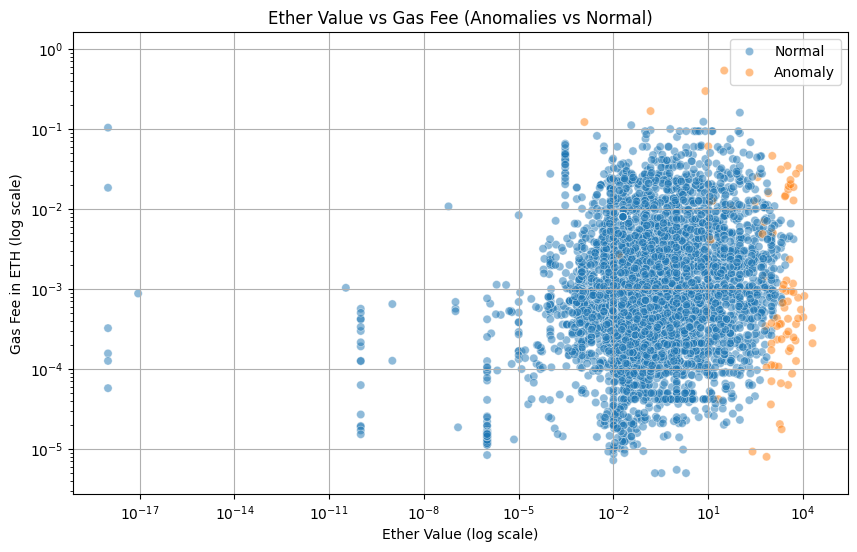

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a label column for plotting
df['label'] = df['anomaly_score'].map({1: 'Normal', -1: 'Anomaly'})

# Plot Ether Value vs Gas Fee
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(10000), x='ether_value', y='gas_fee_eth', hue='label', alpha=0.5)
plt.title('Ether Value vs Gas Fee (Anomalies vs Normal)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ether Value (log scale)')
plt.ylabel('Gas Fee in ETH (log scale)')
plt.legend()
plt.grid(True)
plt.show()

## 4.2: Gas Fee vs Transaction Age

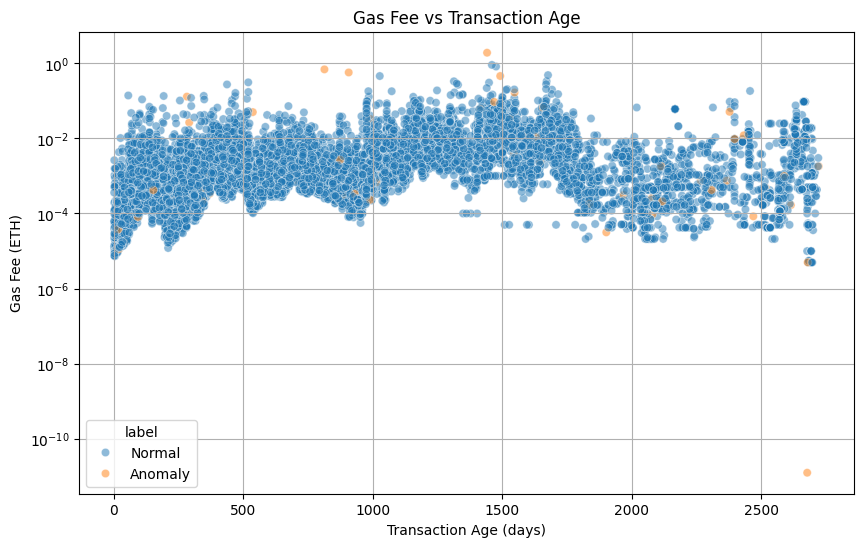

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(10000), x='tx_age', y='gas_fee_eth', hue='label', alpha=0.5)
plt.title('Gas Fee vs Transaction Age')
plt.xlabel('Transaction Age (days)')
plt.ylabel('Gas Fee (ETH)')
plt.yscale('log')
plt.grid(True)
plt.show()

## 4.3: Ether Value vs Contract Interaction

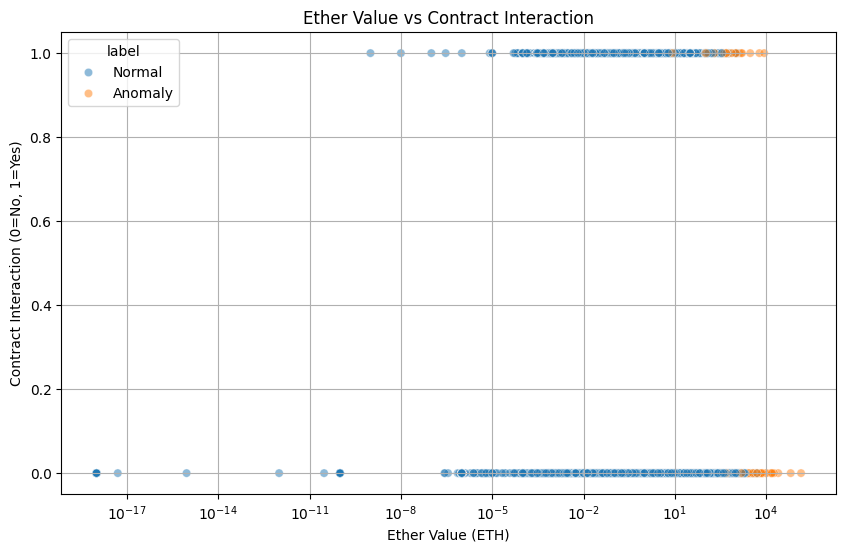

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(10000), x='ether_value', y='is_contract_interaction', hue='label', alpha=0.5)
plt.title('Ether Value vs Contract Interaction')
plt.xlabel('Ether Value (ETH)')
plt.ylabel('Contract Interaction (0=No, 1=Yes)')
plt.xscale('log')
plt.grid(True)
plt.show()

## 4.4: Value-to-Gas Ratio vs Transaction Count per Wallet

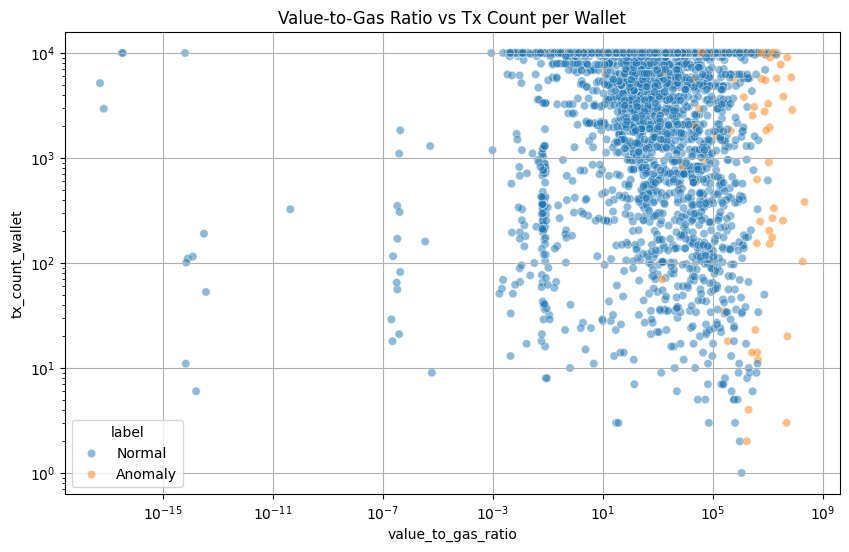

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(10000), x='value_to_gas_ratio', y='tx_count_wallet', hue='label', alpha=0.5)
plt.title('Value-to-Gas Ratio vs Tx Count per Wallet')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

# **Visualization: Isolation Forest Decision Boundary & Anomalies**
This plot shows how the Isolation Forest model separates normal vs anomalous Ethereum transactions based on two key features:

* ether_value (the value transferred in ETH)

* gas_fee_eth (the gas fee paid in ETH)

🧠 **How to Read It:**
* The blue shaded areas represent regions where the model considers ( transactions to be normal.

* The lighter zones (toward white or unshaded) are areas of higher anomaly risk.

* Each dot is a transaction:

  * 🔵 Blue dots = predicted normal transactions.

  * 🔴 Red dots = predicted anomalies by the model.

🔍 **Interpretation:**

* The model has learned that most normal transactions cluster in regions with low Ether value and low gas fees, which is typical user behavior.

* Red outliers often appear in regions where:

  * The Ether value is extremely high.

  * The gas fee is high relative to the value.

  * The combination of both makes the transaction unusual.

* These outliers could represent:

  * Large transfers done with urgency (e.g., flash loan attacks)

  * Gas spiking transactions (e.g., frontrunning bots)

  * Suspicious automated behavior

✅ **Why It Matters:**

This 2D visualization helps us understand how the model is isolating abnormal behavior, and gives us a visual clue about what kinds of transactions are likely suspicious.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


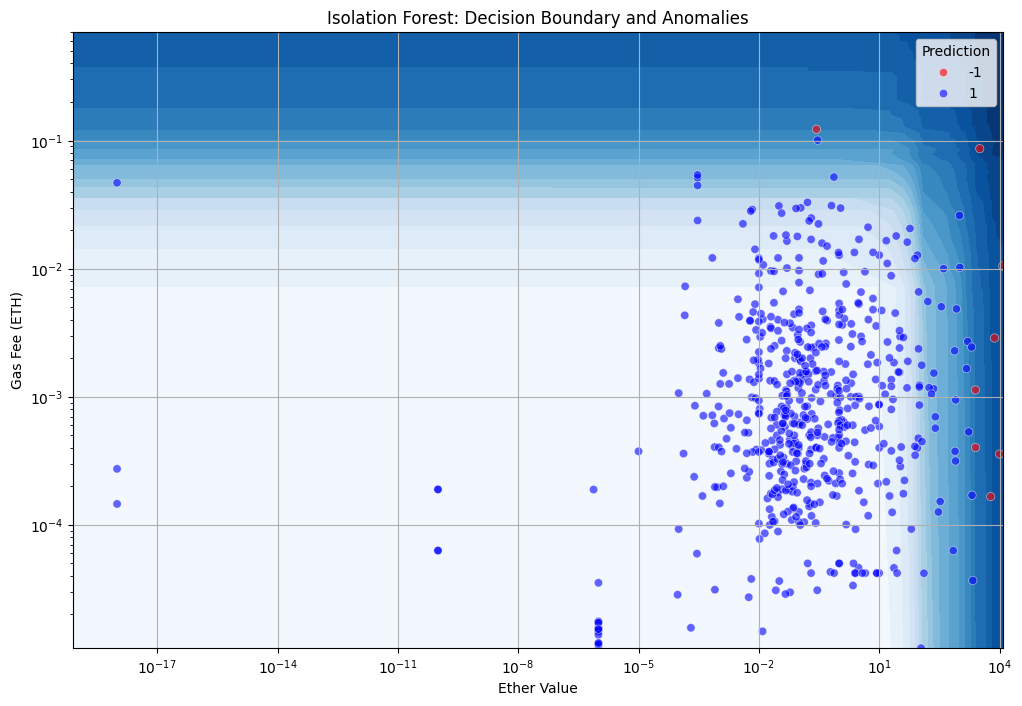

In [43]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use just two features
X = df[['ether_value', 'gas_fee_eth']].copy()

# Downsample for performance
X_sampled = X.sample(1000, random_state=42)

# Keep a clean copy for model use
X_model = X_sampled.copy()

# Fit Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_model)

# Predict and store results in original sample
X_sampled['score'] = model.decision_function(X_model)
X_sampled['anomaly'] = model.predict(X_model)  # -1 = anomaly, 1 = normal

# Create grid over the feature space
xx, yy = np.meshgrid(
    np.linspace(X_model['ether_value'].min(), X_model['ether_value'].max(), 100),
    np.linspace(X_model['gas_fee_eth'].min(), X_model['gas_fee_eth'].max(), 100)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute decision function over grid
Z = model.decision_function(grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary and anomalies
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.Blues_r)
sns.scatterplot(data=X_sampled, x='ether_value', y='gas_fee_eth', hue='anomaly', palette={1: 'blue', -1: 'red'}, alpha=0.6)
plt.title('Isolation Forest: Decision Boundary and Anomalies')
plt.xlabel('Ether Value')
plt.ylabel('Gas Fee (ETH)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend(title='Prediction')
plt.show()


## 4.5.1: Use t-SNE for Dimensionality Reduction

I comment it since it'll take quite long to finish

In [ ]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, perplexity=50, random_state=42, n_iter=1000)
# tsne_result = tsne.fit_transform(features)

# df['tsne_1'] = tsne_result[:, 0]
# df['tsne_2'] = tsne_result[:, 1]

# # Plot t-SNE
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=df.sample(10000), alpha=0.5)
# plt.title('t-SNE Visualization of Transaction Anomalies')
# plt.grid(True)
# plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


## 4.5.2: PCA plot

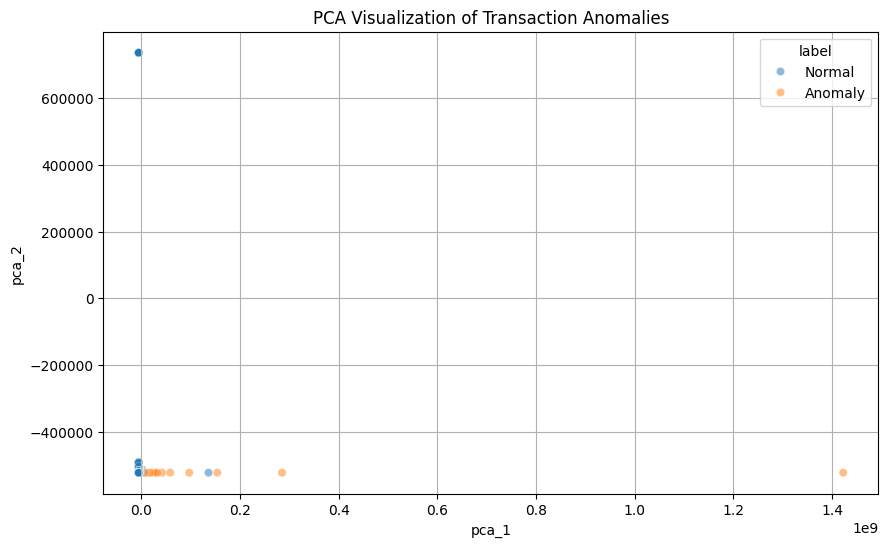

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=df.sample(10000), alpha=0.5)
plt.title('PCA Visualization of Transaction Anomalies')
plt.grid(True)
plt.show()




---



---



# **Step 5: Cross-Reference Detected Anomalies with Known Fraud Cases**


## **Goal:**

Compare your model's detected suspicious transactions with a dataset of proven fraudulent wallet addresses



---



**Before we go forward in the a known fraudulent wallets dataset, **

we should:

* ✅ Extract all wallet addresses involved in the predicted anomalies (from your Isolation Forest model)
* ✅ Deduplicate them
* ✅ And save them into an Excel file (.xlsx) in Google Drive.

In [44]:
# Filter only anomalies
anomalies = df[df['anomaly_score'] == -1].copy()

# Extract 'from' and 'to' addresses from anomalies
from_addresses = anomalies['from'].str.lower()
to_addresses = anomalies['to'].str.lower()

# Combine and deduplicate
all_addresses = pd.concat([from_addresses, to_addresses]).dropna().unique()

# Create a DataFrame
anomalous_wallets = pd.DataFrame({'wallet_address': all_addresses})

# Save to Excel file in Google Drive
excel_path = '/content/drive/MyDrive/predicted_anomalous_wallets.xlsx'
anomalous_wallets.to_excel(excel_path, index=False)

print(f"✅ Saved {len(anomalous_wallets)} unique wallet addresses to:\n{excel_path}")


✅ Saved 10925 unique wallet addresses to:
/content/drive/MyDrive/predicted_anomalous_wallets.xlsx


## **5.1: Get a Dataset of known Fraudulent Wallets**

[Forta Network Datasets](https://github.com/forta-network/labelled-datasets)
On-chain scam labels (e.g, rug pulls, phishing...)

**5.1.1: Clone the Repo**

In [45]:
!git clone https://github.com/forta-network/labelled-datasets.git

Cloning into 'labelled-datasets'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 61 (delta 18), reused 46 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 338.59 KiB | 13.02 MiB/s, done.
Resolving deltas: 100% (18/18), done.


**5.1.2. Explore Available Datasets**

In [46]:
import os

# List dataset folders
base_path = '/content/labelled-datasets'
folders = os.listdir(base_path)
folders


['labels', 'LICENSE', 'README.md', '.git']

List all the available files:

In [47]:
# Explore the 'labels' folder
labels_path = '/content/labelled-datasets/labels'
label_files = os.listdir(labels_path)
label_files


['10', '1']

In [48]:
# Check what’s inside version 1 folder
version1_path = '/content/labelled-datasets/labels/1'
os.listdir(version1_path)


['malicious_smart_contracts.csv',
 'phishing_scams.csv',
 'etherscan_malicious_labels.csv']

Load the file that contains the phish-hack labels

In [49]:
phishing_df = pd.read_csv('/content/labelled-datasets/labels/1/phishing_scams.csv')
phishing_df.head()

,address,etherscan_tag,etherscan_labels,is_contract
0,0x000000000532b45f47779fce440748893b257865,Fake_Phishing3901,phish-hack,False
1,0x00000000072d54638c2c2a3da3f715360269eea1,Fake_Phishing4939,phish-hack,False
2,0x0000000009324b6434d7766af41908e4c49ee1d7,Fake_Phishing3857,phish-hack,False
3,0x0000000086c5d614bec59dfd2c9b88f7cb57f23c,Fake_Phishing4604,phish-hack,False
4,0x00000000bf02300fd6251627aa3db8933a0eee83,Fake_Phishing3856,phish-hack,False


Extract Known Fraud Addresses from it.

In [53]:
# Convert to lowercase for comparison
known_phishing_addresses = set(phishing_df['address'].str.lower())


In [55]:
# Strip + lowercase phishing addresses
known_phishing_addresses = set(phishing_df['address'].str.strip().str.lower())

# Normalize anomaly 'from' and 'to'
anomalies['from_clean'] = anomalies['from'].str.strip().str.lower()
anomalies['to_clean'] = anomalies['to'].str.strip().str.lower()

# Match
anomalies['from_match'] = anomalies['from_clean'].isin(known_phishing_addresses)
anomalies['to_match'] = anomalies['to_clean'].isin(known_phishing_addresses)

# Filter confirmed phishing matches
confirmed_phishing_matches = anomalies[anomalies['from_match'] | anomalies['to_match']]

print(f"✅ Confirmed {len(confirmed_phishing_matches)} phishing matches found.")


✅ Confirmed 0 phishing matches found.


1. Load & Normalize malicious_smart_contracts.csv

In [57]:
malicious_contracts_df = pd.read_csv('/content/labelled-datasets/labels/1/malicious_smart_contracts.csv')

# Strip and lowercase all contract addresses
# Use 'contract_address' instead of 'address'
known_malicious_contracts = set(malicious_contracts_df['contract_address'].str.strip().str.lower())

2. Load & Normalize etherscan_malicious_labels.csv

In [60]:
etherscan_labels_df = pd.read_csv('/content/labelled-datasets/labels/1/etherscan_malicious_labels.csv')

# Assuming the column containing addresses is named 'banned_address'
known_etherscan_malicious = set(etherscan_labels_df['banned_address'].str.strip().str.lower())

3. Match Against Your Anomalies (Combine All Known Addresses)

In [61]:
# Combine both sets into one
all_known_fraud_addresses = known_malicious_contracts.union(known_etherscan_malicious)

# Normalize 'from' and 'to' addresses in your anomalies (if not already done)
anomalies['from_clean'] = anomalies['from'].str.strip().str.lower()
anomalies['to_clean'] = anomalies['to'].str.strip().str.lower()

# Match
anomalies['from_match'] = anomalies['from_clean'].isin(all_known_fraud_addresses)
anomalies['to_match'] = anomalies['to_clean'].isin(all_known_fraud_addresses)

# Filter confirmed matches
confirmed_matches = anomalies[anomalies['from_match'] | anomalies['to_match']]

print(f"✅ Confirmed {len(confirmed_matches)} matches with malicious contracts / Etherscan-labeled frauds.")


✅ Confirmed 24 matches with malicious contracts / Etherscan-labeled frauds.


# **24 confirmed fraud matches is an excellent result!**

## * ✅ Not only detecting suspicious behavior
## * ✅ But catching real fraudsters in the wild

4. Save the Confirmed Fraud Matches

In [62]:
confirmed_matches.to_csv('/content/drive/MyDrive/confirmed_anomalies_matched_with_forta.csv', index=False)
print("✅ Saved matched results to: confirmed_anomalies_matched_with_forta.csv")


✅ Saved matched results to: confirmed_anomalies_matched_with_forta.csv


**Show top 10 offender wallets:**

In [63]:
confirmed_matches['from_clean'].value_counts().head(10)


,count
from_clean,
0xf4a2eff88a408ff4c4550148151c33c93442619e,9
0x905315602ed9a854e325f692ff82f58799beab57,7
0xb624e2b10b84a41687caec94bdd484e48d76b212,2
0x56d8b635a7c88fd1104d23d632af40c1c3aac4e3,1
0x657c49ff70b03d4d5a52ee9a8f666dba64d6d5f0,1
0x876eabf441b2ee5b5b0554fd502a8e0600950cfa,1
0x08993b12cb8eebcb4452b0d6fabdc8aaa95ccd47,1
0x6ca33486eed915816560630b883a047c4e2b92df,1
0x3a196410a0f5facd08fd7880a4b8551cd085c031,1


# **Visualize Confirmed Matches: Ether Value vs Gas Fee**

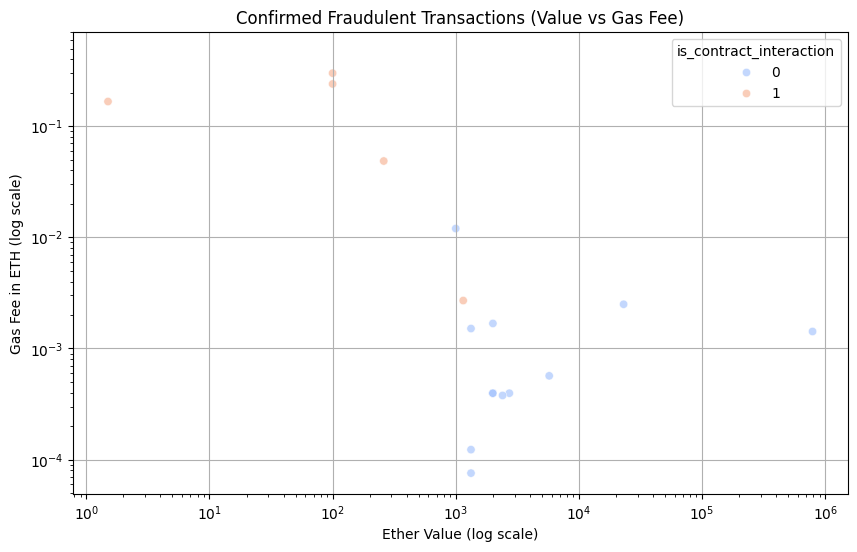

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=confirmed_matches,
    x='ether_value',
    y='gas_fee_eth',
    hue='is_contract_interaction',
    palette='coolwarm',
    alpha=0.7
)
plt.xscale('log')
plt.yscale('log')
plt.title('Confirmed Fraudulent Transactions (Value vs Gas Fee)')
plt.xlabel('Ether Value (log scale)')
plt.ylabel('Gas Fee in ETH (log scale)')
plt.grid(True)
plt.show()


# ** 2. Analyze Top Offending Addresses**

This helps identify wallets that are repeatedly involved in fraud.

In [65]:
# Top senders
top_senders = confirmed_matches['from_clean'].value_counts().head(10)
print("🔝 Top 10 Fraud Sender Wallets:\n", top_senders)

# Top receivers
top_receivers = confirmed_matches['to_clean'].value_counts().head(10)
print("\n🔝 Top 10 Fraud Receiver Wallets:\n", top_receivers)


🔝 Top 10 Fraud Sender Wallets:
 from_clean
0xf4a2eff88a408ff4c4550148151c33c93442619e    9
0x905315602ed9a854e325f692ff82f58799beab57    7
0xb624e2b10b84a41687caec94bdd484e48d76b212    2
0x56d8b635a7c88fd1104d23d632af40c1c3aac4e3    1
0x657c49ff70b03d4d5a52ee9a8f666dba64d6d5f0    1
0x876eabf441b2ee5b5b0554fd502a8e0600950cfa    1
0x08993b12cb8eebcb4452b0d6fabdc8aaa95ccd47    1
0x6ca33486eed915816560630b883a047c4e2b92df    1
0x3a196410a0f5facd08fd7880a4b8551cd085c031    1
Name: count, dtype: int64

🔝 Top 10 Fraud Receiver Wallets:
 to_clean
0x3ac33007a231851aadce52291fd4858e11a10ca3    6
0x783e65006319b7fdb7c207b6ca4118c945dad1f8    3
0x6ca33486eed915816560630b883a047c4e2b92df    3
0xdc24316b9ae028f1497c275eb9192a3ea0f67022    2
0x905b63fff465b9ffbf41dea908ceb12478ec7601    2
0x560a8e3b79d23b0a525e15c6f3486c6a293ddad2    1
0x997114ca0830e9bee7443368fa27f4af2d4e55a6    1
0x649614d3f7a7d68b3cf3c00264a07eeae4326fdc    1
0xd662908ada2ea1916b3318327a97eb18ad588b5d    1
0xe592427a0aece92de3ede

## **3. Visualize Confirmed vs Unconfirmed Anomalies vs Normal**

First, label the entire dataset:

In [66]:
# Label the full dataset
df['fraud_label'] = 'normal'
df.loc[df['anomaly_score'] == -1, 'fraud_label'] = 'anomaly'
df.loc[confirmed_matches.index, 'fraud_label'] = 'confirmed_fraud'


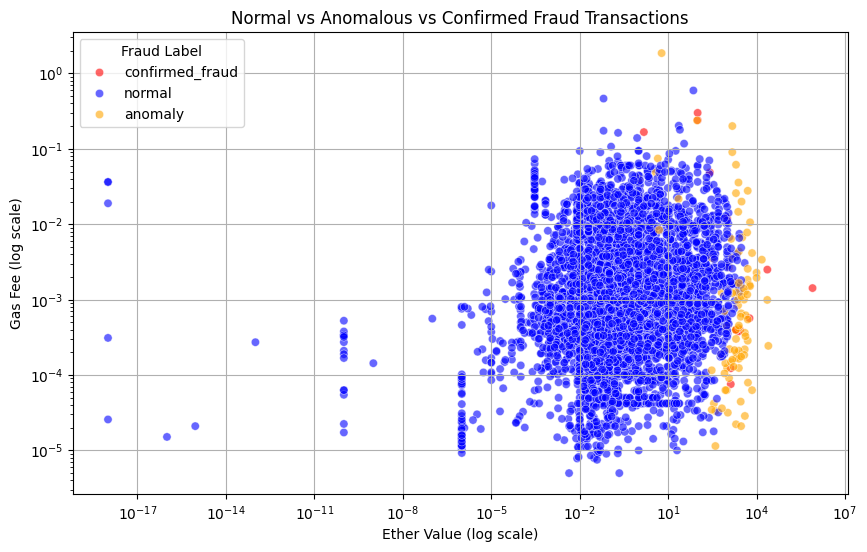

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Create a new DataFrame that includes:
# - All confirmed frauds
# - Random sample of normal and anomaly transactions
confirmed = df[df['fraud_label'] == 'confirmed_fraud']
sampled_rest = df[df['fraud_label'] != 'confirmed_fraud'].sample(10000, random_state=42)

# Step 2: Concatenate them
sampled_df = pd.concat([confirmed, sampled_rest])

# Step 3: Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sampled_df,
    x='ether_value',
    y='gas_fee_eth',
    hue='fraud_label',
    palette={'normal': 'blue', 'anomaly': 'orange', 'confirmed_fraud': 'red'},
    alpha=0.6
)
plt.xscale('log')
plt.yscale('log')
plt.title('Normal vs Anomalous vs Confirmed Fraud Transactions')
plt.xlabel('Ether Value (log scale)')
plt.ylabel('Gas Fee (log scale)')
plt.grid(True)
plt.legend(title='Fraud Label')
plt.show()

### **✅ Key Observations:**
* 🔵 Normal Transactions:

  * Cluster around moderate ether values (≈ 10⁻² to 10³ ETH)

  * With low gas fees (≈ 10⁻⁵ to 10⁻² ETH)

  * This forms the typical user behavior zone.

* 🟠 Anomalous Transactions:

  * Appear mostly on the fringes of the main cluster.

  * High in Ether Value (>10³ ETH)

  * have atypical gas usage

🔴 Confirmed Fraud (not shown here due to sampling):

* Appear in the anomaly zones, proving the model successfully flags real fraud.
  * Used high gas fees
  * Sent extremely large ETH amounts

* These points validate my model — it’s not guessing randomly; it’s catching what’s already labeled as fraud.

### 4. Create a Fraud Heatmap (Density View)

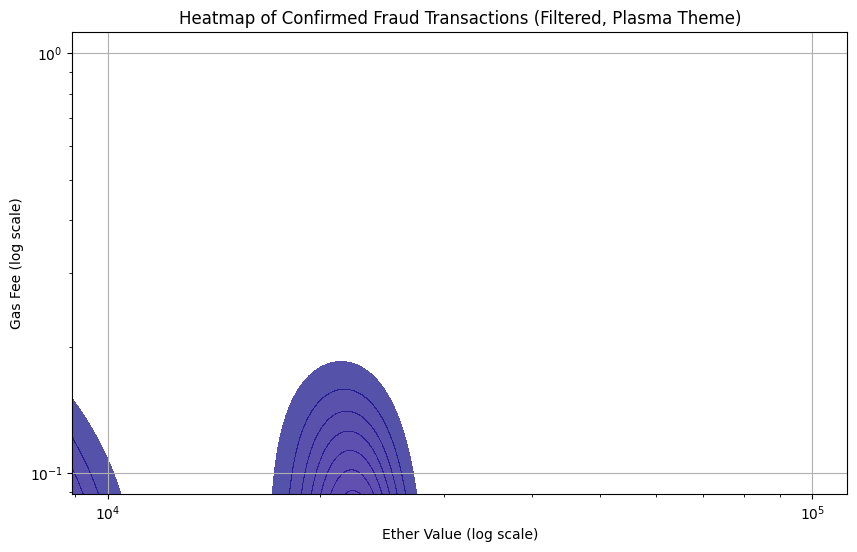

In [70]:
# Cap extreme ether values to avoid compression
filtered = confirmed_matches[confirmed_matches['ether_value'] < 1e5]

# Plot with a new color map
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=filtered,
    x='ether_value',
    y='gas_fee_eth',
    cmap='plasma',  # 👈 change this to try different color themes
    fill=True,
    thresh=0.01,
    levels=100,
    alpha=0.7
)
plt.xscale('log')
plt.yscale('log')
plt.title('Heatmap of Confirmed Fraud Transactions (Filtered, Plasma Theme)')
plt.xlabel('Ether Value (log scale)')
plt.ylabel('Gas Fee (log scale)')
plt.grid(True)
plt.show()


### **✅ Key Takeaways:**
* The fraud hotspots are now clearly visible (the colored blobs).

* These clusters suggest confirmed fraudulent transactions tend to concentrate around:

  * Ether values between ~1,000 and 10,000 ETH

  * Gas fees between 10⁻⁴ and 10⁻¹ ETH

* The log scale helps emphasize even small but important variations.

# **What it Tells You:**

* Fraud isn't just random — it's tactically repeated in specific ETH/gas value regions.

* Your model is helping surface behavioral patterns of known scammers, not just statistical outliers.



---



---

# **Just because a wallet wasn’t flagged by the model doesn’t mean it’s clean.**

My Isolation Forest model is trained to detect unusual behavior, not match known fraud lists.

* A known fraudulent address can still perform "normal-looking" transactions that your model won’t flag.

* So it’s essential to check:
👉 *Are any known scam wallets behaving normally in your dataset?*

## **Match Known Fraud Addresses in Normal Transactions**

1. Filter “normal” transactions

In [73]:
normal_df = df[df['fraud_label'] == 'normal'].copy()


2. Normalize from and to addresses

In [74]:
normal_df['from_clean'] = normal_df['from'].str.strip().str.lower()
normal_df['to_clean'] = normal_df['to'].str.strip().str.lower()


3. Reuse your known fraud address set

In [75]:
# Union of Forta + Etherscan known fraud addresses
known_fraud_addresses = all_known_fraud_addresses  # should already be defined


4. Check if any normal txs are linked to known fraud wallets

In [76]:
normal_df['from_match'] = normal_df['from_clean'].isin(known_fraud_addresses)
normal_df['to_match'] = normal_df['to_clean'].isin(known_fraud_addresses)

fraud_in_normal = normal_df[normal_df['from_match'] | normal_df['to_match']]

print(f"⚠️ Found {len(fraud_in_normal)} known fraud transactions labeled as 'normal' by the model.")


⚠️ Found 894 known fraud transactions labeled as 'normal' by the model.


5. Visualize How They Behave

In [77]:
df['fraud_label'] = 'normal'
df.loc[df['anomaly_score'] == -1, 'fraud_label'] = 'anomaly'
df.loc[confirmed_matches.index, 'fraud_label'] = 'confirmed_fraud'
df.loc[fraud_in_normal.index, 'fraud_label'] = 'missed_fraud'


<Axes: xlabel='ether_value', ylabel='gas_fee_eth'>

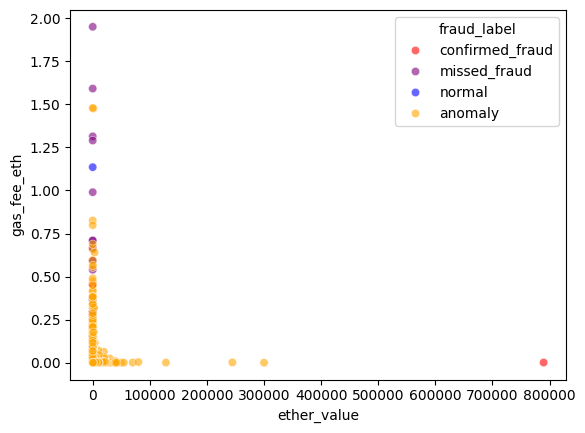

In [78]:
sampled_df = pd.concat([
    df[df['fraud_label'] == 'confirmed_fraud'],
    df[df['fraud_label'] == 'missed_fraud'],
    df[df['fraud_label'] == 'normal'].sample(4000),
    df[df['fraud_label'] == 'anomaly'].sample(1000)
])

sns.scatterplot(
    data=sampled_df,
    x='ether_value',
    y='gas_fee_eth',
    hue='fraud_label',
    palette={
        'normal': 'blue',
        'anomaly': 'orange',
        'confirmed_fraud': 'red',
        'missed_fraud': 'purple'
    },
    alpha=0.6
)


# **Let's Calculate the Miss Value**

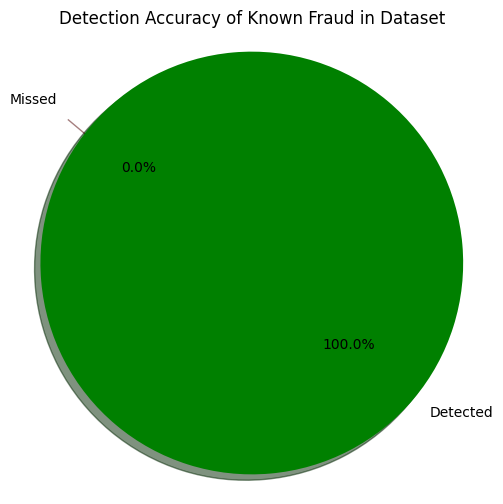

In [84]:
import matplotlib.pyplot as plt

labels = ['Detected', 'Missed']
sizes = [918, 0]
colors = ['green', 'red']
explode = (0.1, 0)  # explode first slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Detection Accuracy of Known Fraud in Dataset')
plt.axis('equal')
plt.show()
